# Проект: Исследование стартапов

Автор: Чимбир В.И.

Дата: 21.04.2025.

## Введение

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

Цели проекта:

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [62]:
# Импортируем библиотеку pandas
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.mode.chained_assignment = None
import sys
!{sys.executable} -m pip install matplotlib-venn
from matplotlib_venn import venn2, venn3 


In [2]:
# Загрузим необходимые датасеты
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

# Загрузим дополнительные датасеты
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

Таблица `acquisition` содержит информацию о покупках одними компаниями других компаний:

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

In [3]:
# Выгрузим информацию о датафрейме acquisition_df
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [4]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Названия столбцов датафрейма `acquisition_df` соответсвуют данным и единому стилю.  

-----

Таблица `company_and_rounds` cодержит информацию о компаниях и раундах финансирования:

- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.


In [5]:
# Выгрузим информацию о датафрейме company_and_rounds_df
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [6]:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Названия столбцов датафрейма `company_and_rounds` следует отредактировать: привести все столбцы к единому стилю snake_case.

In [7]:
# Приведем названия столбцов к единому стилю
company_and_rounds_df = company_and_rounds_df.rename(columns = {'company  ID':'company_id_x',
                                                                'category  code':'category_code',
                                                                'founded  at': 'founded_at',
                                                                'closed  at': 'closed_at',
                                                                'network  username':'network_username',
                                                                'country  code':'country_code',
                                                                'investment  rounds':'investment_rounds',
                                                                'funding  rounds':'funding_rounds',
                                                                'funding  total' : 'funding_total',
                                                                'funding  round  id':'funding_round_id',
                                                                'company  id':'company_id',
                                                                'funded  at':'funded_at',
                                                                'funding  round  type':'funding_round_type',
                                                                'raised  amount':'raised_amount',
                                                                'pre  money  valuation':'pre_money_valuation',
                                                                'is  first  round':'is_first_round',
                                                                'is  last  round':'is_last_round'})

In [8]:
# Проверим результат
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id_x         217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

Наблюдаем дюбликат столбца `company_id`

-----


Таблица `people` cодержит информацию о сотрудниках:

- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.


In [9]:
# Выгрузим информацию о датафрейме people_df
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [10]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Названия столбцов датафрейма `people_df` соответсвуют содержанию и представлены в едином стиле.

-----

Таблица `education` cодержит информацию об образовании сотрудника:


- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.


In [11]:
# Выгрузим информацию о датафрейме education_df
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [12]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Столбцы датафрейма `education_df` соответсвуют содержанию и представлены в едином стиле.

------

Таблица `degrees` cодержит информацию о типе образования сотрудника:

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.


In [13]:
# Выгрузим информацию о датафрейме degrees_df
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [14]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Данные датафрейма `degrees_df` соответсвуют содержанию и представлены в едином стиле.

----

Таблица `fund` cодержит информацию о фондах:

- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.


In [15]:
# Выгрузим информацию о датафрейме fund_df
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [16]:
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


Столбцы датафрейма `fund_df` соответсвуют содержанию и представлены в едином стиле.

------

Таблица `investment` cодержит информацию о раундах инвестирования:

- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

In [17]:
# Выгрузим информацию о датафрейме investment_df
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [18]:
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Столбцы датафрейма `investment_df` соответсвуют содержанию и представлены в едином стиле.

-------

Промежуточные итоги:

- познакомились с данными каждого датасета.
- привели к единому стилю snake_case названия столбцов.
- наблюдаем пропуски практически в каждом датафрейме. 


### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [19]:
# Преобразуем тип данных в столбцах, которые хранят дату и время в датафрейме company_and_rounds_df
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'])
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'])
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])

In [20]:
# Преобразуем тип данных, в столбцах, которые хранят дату и время в датафрейме education_df
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])


In [21]:
# Преобразуем типы данных в датафрейме acquisition_df
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])

In [22]:
# Так же преобразуем тип данных, хранящие дату и время в датафрейме fund_df
fund_df['founded_at'] = pd.to_datetime(fund_df['founded_at'])


Изучим доли пропусков в каждой серии каждого датафрейма:

In [23]:
# Изучим доли пропусков серий датафрейма acquisition_df
acquisition_df.isna().sum() / acquisition_df.shape[0]*100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

- 80% пропусков в данных с информацией о типе оплаты. Доля очень большая, но для целей нашего ислледования отсутсвие этих данных не критично.
- крайне незначительные пропуски в столбце с информацией о дате сделки. 
- отсутсвуют пропуски в id сделок и id компаний. 

In [24]:
# Изучим доли пропусков серий датафрейма company_and_rounds_df
company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]*100

company_id_x            0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

- Наблюдаем очень похожие доли пропусков у некоторых столбцов - возможно это реультат присоединения двух датасетов до этого.
- Пропуски в столбце `closed_at`, содержащем информацию о дате закрытия компании, вполне естественны. 
- Пропуски в столбцах `domain` , `network_username` никак не повляют на решение задач исследования.
- Практически у половины данных нет информации либо о дате создания компании, либо о стране. Но это так же не должно исказить результаты иследования.
- Большие пропуски (около 76%) в столбцах содержащих информацию о финансировании и раундах. Это достаточно сильно может искзаить результаты ислледования.

In [25]:
# Изучим доли пропусков серий датафрейма people_df
people_df.isna().sum() / people_df.shape[0]*100

id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

- Больше 80% пропусков в столбцах с id и никнеймом компании.

In [26]:
# Изучим доли пропусков серий датафрейма education_df
education_df.isna().sum() / education_df.shape[0]*100

id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

- Почти у половины данных отсутвует информация о дате окончания обучения. 

In [27]:
# Изучим доли пропусков серий датафрейма degrees_df
degrees_df.isna().sum() / degrees_df.shape[0] * 100

id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

- Пропуски сильно повлияющие на анализ отсутсвуют.

In [28]:
# Изучим доли пропусков серий датафрейма fund_df
fund_df.isna().sum() / fund_df.shape[0] * 100

id                     0.000000
name                   0.017164
founded_at            60.478888
domain                36.817714
network_username      81.556814
country_code          39.469619
investment_rounds      0.000000
invested_companies     0.000000
milestones             0.000000
dtype: float64

- Так же, как и в таблице с компаниями и финансированием, наблюдаем высокие доли пропусков в столбцах `founded_at`,`country_code`
- Пропуски в столбцах `domain` и `network_username` повлиять на анализ никак не должны.

In [29]:
# Изучим доли пропусков серий датафрейма investment_df
investment_df.isna().sum() / investment_df.shape[0] * 100

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

- Пропуски отсутствуют.

--------

Промежуточные итоги и выводы:

- Изменили типы данных для столбцов, содержащих информацию о дате и времени.
- Нашли большое количество пропусках в нескольких датафреймах. Часть из них закономерна, часть не повлияет на исследнвание.
- Так же есть часть пропусков, которые могут исказить аналитическую картину, а именно пропуски в столбцах содержащих информацию о финансировании и раундах финансирования.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

--------

In [30]:
# Создадим новый столбец для разделения периодов финансирования по годам
company_and_rounds_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year

In [31]:
# Проверим стандартные показатели серии, по которой будем делать агрегацию
company_and_rounds_df['raised_amount'].describe()

count    5.292800e+04
mean     7.946092e+06
std      4.216821e+07
min      0.000000e+00
25%      2.463300e+05
50%      1.600000e+06
75%      6.700000e+06
max      3.835050e+09
Name: raised_amount, dtype: float64

In [32]:
# Сгруппируем данные
pivot = company_and_rounds_df.groupby('funded_year')['raised_amount'].agg(['count','median'])

In [33]:
# Отфильтруем данные согласно требованиям заказчика
filtered_pivot = pivot[pivot['count']>50]

In [34]:
# Выгрузим таблицу
filtered_pivot.reset_index()

,funded_year,count,median
0,1999.0,76,2000000.0
1,2000.0,125,4200000.0
2,2001.0,96,3000000.0
3,2002.0,116,4200000.0
4,2003.0,159,3000000.0
5,2004.0,291,5000000.0
6,2005.0,1633,5500000.0
7,2006.0,2436,5000000.0
8,2007.0,3279,3973320.0
9,2008.0,3774,3110000.0


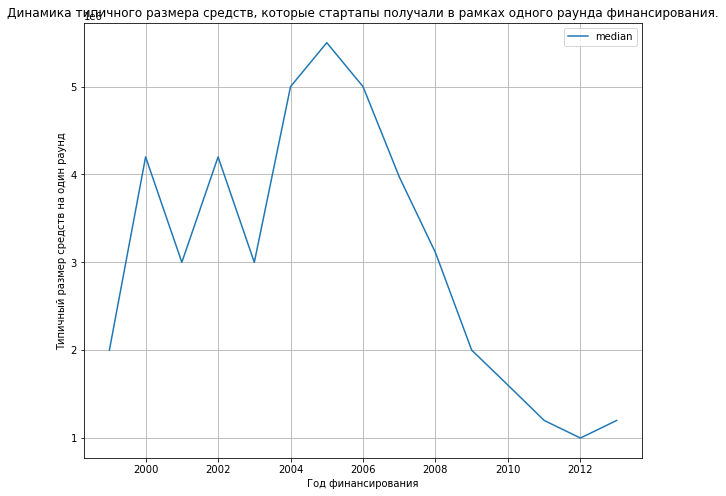

In [35]:
filtered_pivot.plot.line(figsize=(10,8), y='median')

plt.title('Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.')
plt.xlabel('Год финансирования')
plt.ylabel('Типичный размер средств на один раунд')
plt.grid()



Ответы на вопросы задачи:

- Максимально большой типичный сбор средств за один раунд приходтся на 2005-ый год.
- в 2013-ом году мы имеем самое большое количество раундов из выборки наших данных за все года, при этом типичное значение собранных средств за раунд - наоборот практически наименьшее (меньше только в 2012-ом году).


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

-------------

Присоединим таблицу `education` к таблице `people`, что поможет оценить долю сотрудников без информации об образовании

In [36]:
# Присоединяем таблицы
people_education = people_df.merge(education_df, left_on='id',right_on='person_id', how='left')

In [37]:
# Выводим информацию
people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [38]:
# Изучаем пропуски
people_education.isna().sum()/people_education.shape[0]

id_x                0.000000
first_name          0.000019
last_name           0.000004
company_id          0.832686
network_username    0.810324
id_y                0.592609
person_id           0.592609
instituition        0.592811
graduated_at        0.784489
dtype: float64

Информация об образовании присутсвует лишь для 59% сотрудников

In [39]:
# Сгруппируем данные 
cat_1 = people_education.groupby('company_id')['id_x'].count().reset_index()

In [40]:
cat_1 = cat_1.rename(columns={'id_x':'count_people'})

In [41]:
cat_1['count_people'].describe()

count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        376.000000
Name: count_people, dtype: float64

In [42]:
# Отредактирую в след. ячейке
# Разделим данные по категориям, по размеру штата сотрудников
# cat_1['category'] = pd.cut(cat_1['count_people'],bins=[0,50,100,377],labels=['Мало','Средне','Много'])

In [43]:
cat_1['category'] = pd.cut(cat_1['count_people'],bins=[0,1,10,50,200,500,1000], labels=['1', '2–10', '11–50', '51–200', '201–500', '500+'])

In [44]:
cat_1

,company_id,count_people,category
0,1.0,3,2–10
1,2.0,1,1
2,3.0,5,2–10
3,4.0,18,11–50
4,5.0,84,51–200
...,...,...,...
22917,285897.0,2,2–10
22918,285953.0,1,1
22919,285972.0,2,2–10
22920,285996.0,1,1


In [45]:
# Присоединим информацию о категориях к датасету
people_education_2 = people_education.merge(cat_1,on='company_id')

In [46]:
# Проверим результат
people_education_2.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,count_people,category
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,84,51–200
1,10430,Ruchi,Sanghvi,5.0,rsanghvi,4247.0,10430.0,Carnegie Mellon University,NaT,84,51–200
2,10430,Ruchi,Sanghvi,5.0,rsanghvi,4248.0,10430.0,Carnegie Mellon University,NaT,84,51–200
3,106199,Adam,Marchick,5.0,adammarstanford,15666.0,106199.0,Stanford University,2002-01-01,84,51–200
4,108814,Jimmy,Zhu,5.0,jyzhu,16050.0,108814.0,Massachusetts Institute of Technology (MIT),NaT,84,51–200


In [47]:
# Сгруппируем данные о сотрудниках по категориям
cat_people_education = people_education_2.groupby('category').agg({'person_id': 'count',
                                 'id_x': 'count'})

In [48]:
cat_people_education

,person_id,id_x
category,,
1,5769,14150
2–10,18991,25485
11–50,2564,3546
51–200,833,1011
201–500,481,597
500+,0,0


In [49]:
# Рассчитаем полноту данных по категориям
cat_percent = cat_people_education['person_id']/cat_people_education['id_x']

In [50]:
cat_percent.reset_index()

,category,0
0,1,0.407703
1,2–10,0.745183
2,11–50,0.723068
3,51–200,0.823937
4,201–500,0.805695
5,500+,NaN


In [51]:
degrees_df.head(10)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


In [52]:
education_df.head(10)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


Столбцы `person_id` из таблицы education и `object_id` из таблицы degrees похожи на ключ. Однако `object_id` требует преобразования.

In [53]:
# Отредактируем столбец 
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:','')

In [54]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


Промежуточный итог:

- Оценили неполноту данных об образовании относительно категорий компаний по штату сотрудников. 
- После редактирования таблицу `degrees_df` можно присоединить к `education_df` по столбцам `object_id` и `person_id` соответственно. 

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

-------

Изучим уникалные значения для каждого столбца с названием `network_username` в разных датасетах:

In [55]:
people_df['network_username'].unique()

array([nan, 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

In [56]:
company_and_rounds_df['network_username'].unique()

array(['BachelrWetpaint', nan, 'Hostnine', ..., 'networkzend',
       'pPhotonet', 'Photonet'], dtype=object)

In [57]:
fund_df['network_username'].unique()

array([nan, 'greylockvc', 'imi_vc', ..., 'CalSTRS', 'haystack_fund',
       'fbFund'], dtype=object)

На этапе знакоства с данными было выясненно, что данные под одинаковым названием столбца в разных датасетах - имеют разный контекст. 

При изучении уникальных значений - схожести так же не обнаружено.

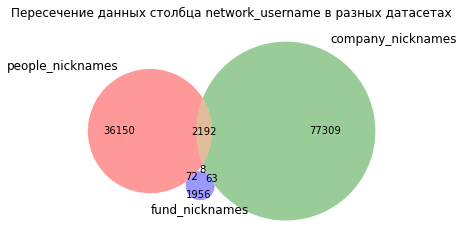

In [63]:

from matplotlib_venn import venn2, venn3 
import matplotlib.pyplot as plt

# Строим диаграмму Венна
venn3([set(people_df['network_username']), set(company_and_rounds_df['network_username']),set(fund_df['network_username'])], set_labels=('people_nicknames','company_nicknames', 'fund_nicknames'))

# Отображаем график
plt.title("Пересечение данных столбца network_username в разных датасетах")
plt.show()        

Диограмма показывает очень низкий процент пересечения данных. Объединение данных по столбцу `network_username` не является корректным.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

----------

In [64]:
# Еще раз выведем информацию о датасете
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_x         217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [65]:
# Выведем пропуски в процентах
company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]*100

company_id_x            0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
funded_year            75.809784
dtype: float64

In [ ]:
# Отсортируем по полю `company_id` для наглядности
company_and_rounds_df.sort_values(by='company_id').head(10)

Судя по схожим долям пропусков между столбцами из начала и конца таблицы - скорее всего это последствия присоединения двух датасетов по полю `company_id` с параметром `full`

Для удобства разделим текущий датафрейм на два разных датасета:

In [66]:
# Создадим новый датафрейм, содержащий информацию о компаниях
company_df = company_and_rounds_df.iloc[:,:13]

In [67]:
company_df = company_df.drop_duplicates(subset=['company_id_x', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones'], keep='first')

In [68]:
company_df = company_df.dropna(subset=['company_id_x'])

In [69]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_x       196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [70]:
# Преобразуем типы данных
company_df['funding_total'] = company_df['funding_total'].astype('int64')

In [76]:
# Делаем отдельную таблицу по раундам инвестирования
rounds_df = company_and_rounds_df[['company_id', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round', 'funded_year']]

In [77]:
# Cмотрим пропуски
display(rounds_df[rounds_df['funding_round_type'].isna()].head()) 

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Удаляем пропуски
rounds_df=rounds_df.dropna(subset=['funding_round_type'])

Промежуточный итог:

- Данные датасета `company_and_rounds` скорее всего содержались ранее в разных датасетах.
- Проанализировав данные и пропуски, принято решение разделить датасет на две исходные таблицы: `company_df` и `rounds_df`


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [79]:
# Отфильтруем датафрейм согласно заданию
filtered_company_df = company_df[(company_df['funding_rounds']>0)|
                                 (company_df['investment_rounds']>0)|
                                 (company_df['status']=='acquired')]

In [80]:
filtered_company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id_x       40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  int64         
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory

In [81]:
# Объединим таблицы acquisition_df и filtered_company_df
merged_df = pd.merge(filtered_company_df,acquisition_df, left_on='company_id_x',right_on='acquired_company_id',how='left')

In [82]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id_x          40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  int64         
 12  milestones            40890 non-null  float64       
 13  id              


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [83]:
# Посмотрим стандартные показатели
filtered_company_df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

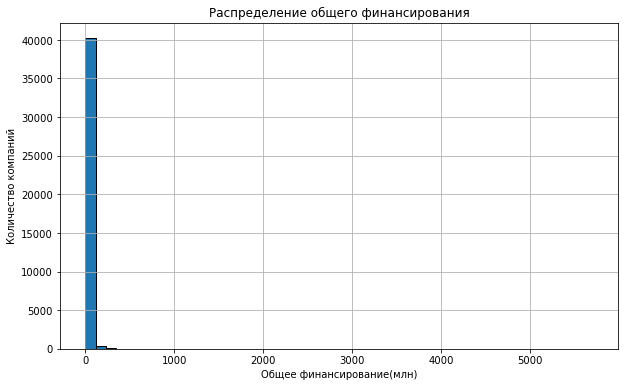

In [84]:
# Гистограмма для оценки распределения
plt.figure(figsize=(10, 6))
plt.hist(filtered_company_df['funding_total']/1e6, bins=50,edgecolor='black')
plt.title('Распределение общего финансирования')
plt.xlabel('Общее финансирование(млн)')
plt.ylabel('Количество компаний')
plt.grid()


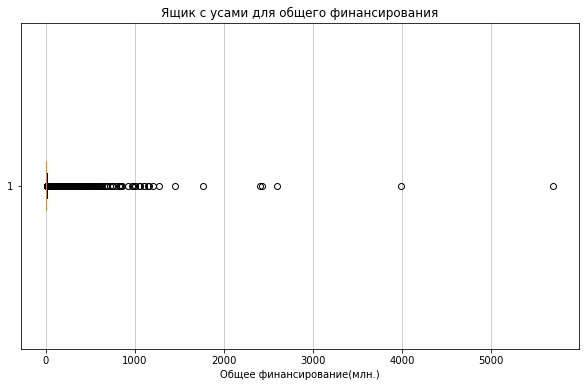

In [85]:
# Ящик с усами для выявления выбросов
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_company_df['funding_total']/1e6, vert=False, whis=1.5)
plt.title('Ящик с усами для общего финансирования')
plt.xlabel('Общее финансирование(млн.)')
plt.grid(axis='x', alpha=0.75)


Изучаемый набор данных содержит информацию о финансах разной степени давности для компаний разного уровня. Медиана очень сильно отличается от среднего значения. 

Изучив данные и графики прихожу к выводу, что стандартные методы оценки типичных значений и выбросов для этого столбца не применимы.

Посчитаем выбросы с помощью IQR:

In [86]:
funding_total_values = filtered_company_df['funding_total']

Q1 = funding_total_values.quantile(0.25)
Q3 = funding_total_values.quantile(0.75)
IQR = Q3 - Q1

In [87]:
# Посчитаем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-8475975.0
14126625.0


In [88]:
# Узнаем процентиль верхней границы
(funding_total_values > upper_bound).mean() * 100


14.376518516700616

Промежуточные итоги и выводы:

- Стандартные показатели не применимы для оценки выбросов и типичных. 
- Выбросов снизу не обнаружно. 
- Верхняя граница выбросов - $14.126.625 (~14%)


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [89]:
# Отфильтруем данные по условиям задачи
cheap_sales = merged_df[(merged_df['price_amount'].isin([0,1]))&(merged_df['funding_total'] > 0)]

In [90]:
cheap_sales.head()

,company_id_x,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
63,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000,2.0,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
66,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000,1.0,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
67,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000,2.0,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
68,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000,1.0,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01


In [91]:
# Узнаем количество таких компаний
cheap_sales.shape[0]

1618

Для исследования рассмотрим динамику таких сделок по годам. 

In [92]:
# Создадим с толбец с информацией о годе сделки
cheap_sales['year'] = cheap_sales['acquired_at'].dt.year
# Cгруппируем данные по годам
deals_by_year = cheap_sales.groupby('year').size()

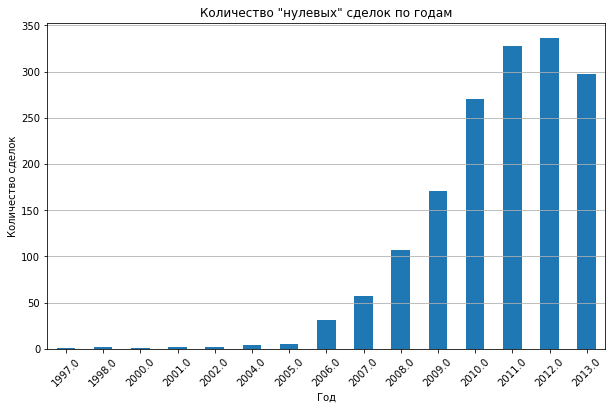

In [93]:
# Построим диограмму
plt.figure(figsize=(10, 6))
deals_by_year.plot(kind='bar')
plt.title('Количество "нулевых" сделок по годам')
plt.xlabel('Год')
plt.ylabel('Количество сделок')
plt.xticks(rotation=45)
plt.grid(axis='y')

- Найдено 1618 таких компаний
- Больше всего таких сделок (более 300) в 2011 и в 2012 годах.

Исследуем выбросы столбца `funding_total` с помощью IQR:

In [94]:
# Посчитаем значение IQR
funding_values = cheap_sales['funding_total']

Q1 = funding_values.quantile(0.25)
Q3 = funding_values.quantile(0.75)
IQR = Q3 - Q1


In [95]:
# Посчитаем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-18250000.0
35750000.0


Нижняя граница имеет отрицательное значение. Так как финансы не могут иметь отрицательного значения, делаем вывод, что выбросы снизу отсутсвуют (Процентиль равен 0).

Рассчитаем процентиль верхней границы:


In [96]:
(funding_values > upper_bound).mean() * 100


9.085290482076639

Итоги:

- Найдено 1618 компаний которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.
- Больше всех таких сделок в 2011 и в 2012 годах

Посчитали выбросы для столбца `funding_total`:

- Выбросов снизу не обнаружено.
- Верхняя граница выбросов имеет значение $35.750.000 (~9%)


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

------

Для каждой категории компаний посчитаем медианное значение (типичное), стандартное отклонение (оно покажет разброс цен) и количество сделок (для оценки выборки). 

In [97]:
# Оставим только те данные, для которых указана цена сделки
category_df = merged_df[merged_df['price_amount']>0]

# Сгруппируем данные и посчитаем необзодимые показатели
сategory_stats = category_df.groupby('category_code')['price_amount'].agg(['median','std','count'])

# Отсортируем по медиане и стандартному отклонению по убыванию
сategory_stats = сategory_stats.sort_values(by=['median','std'],ascending=False)

# Отфильтруем по количеству сделок, оставим данные с выборкой не меньше пяти сделок
сategory_stats = сategory_stats[сategory_stats['count']>=5] 

In [98]:
# Выведем топ-10 категорий 
сategory_stats = сategory_stats.reset_index().head(10)

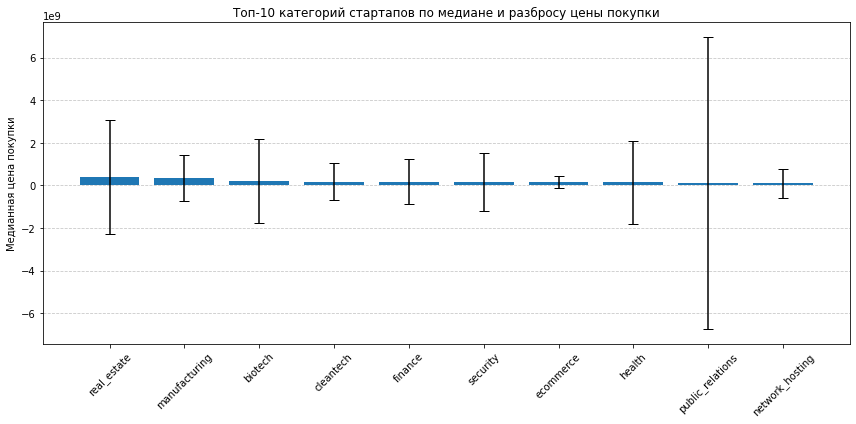

In [99]:
plt.figure(figsize=(12, 6))
plt.bar(
    сategory_stats['category_code'],
    сategory_stats['median'],
    yerr=сategory_stats['std'],
    capsize=5
    

)
plt.xticks(rotation=45)
plt.ylabel('Медианная цена покупки')
plt.title('Топ-10 категорий стартапов по медиане и разбросу цены покупки')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


Промежуточные итоги и выводы: 

- `real_estate` - категория находится в Топ-1 по размеру медианы цены и Топ-2 по размаху цен.
- Самый большой размах цен (вне конкуренции) мы видим в категории `public_relation`, но при этом эта категория лишь на 9-ом месте по размеру медианы цены.



### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [100]:
# Посмотрим уникальные значения столбца 'funding_rounds'
merged_df['funding_rounds'].unique()

array([ 3.,  0.,  1.,  5.,  2.,  7.,  4.,  6.,  8., 10.,  9., 13., 11.,
       15., 14., 12.])

In [101]:
# Посмотрим стандартные показатели столбца funding_rounds
merged_df['funding_rounds'].describe()

count    40890.000000
mean         1.289313
std          1.264921
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

Text(0.5, 1.0, 'Анализ выбросов столбца funding_rounds')

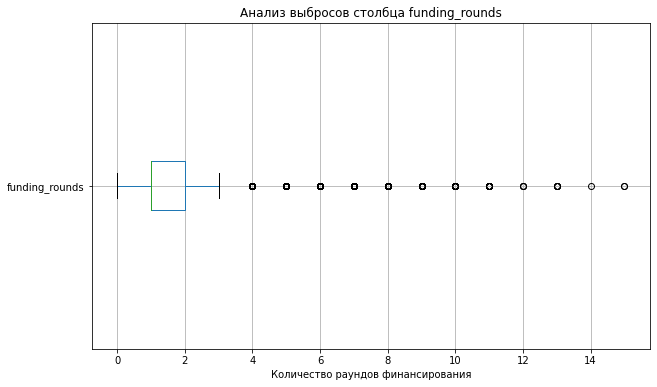

In [102]:
plt.figure(figsize=(10,6))
merged_df.boxplot(column='funding_rounds', vert=False)
plt.xlabel('Количество раундов финансирования')
plt.title('Анализ выбросов столбца funding_rounds')

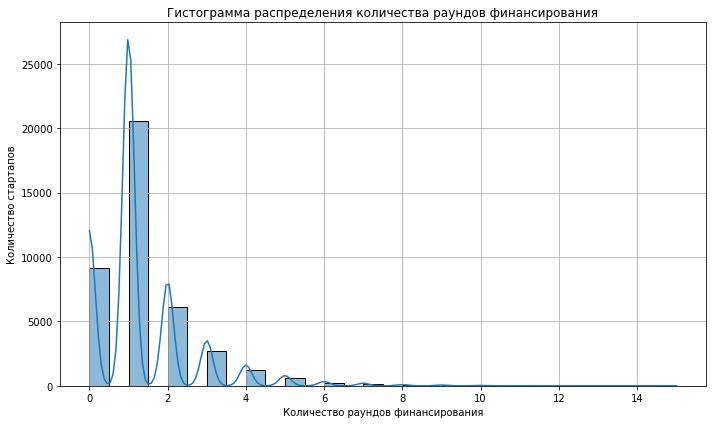

In [103]:
# Пострим гистограмму по столбцу funding_rounds
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['funding_rounds'], bins=30, kde=True)

plt.xlabel("Количество раундов финансирования")
plt.ylabel("Количество стартапов")
plt.title("Гистограмма распределения количества раундов финансирования")
plt.grid()
plt.tight_layout()

- Показатели среднего значения и медианы достаточно близки.
- Наблюдаем правый хвост, имеем выбросы по правой границе.
- В целом для всех компаний типичное количество раундов финансирования - 1 раунд.

Теперь рассмотрим в разрезе статусов:

In [104]:
# Рассчитаем cреднее количество раундов в разрезе статуса
avg_rounds_by_status = merged_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)

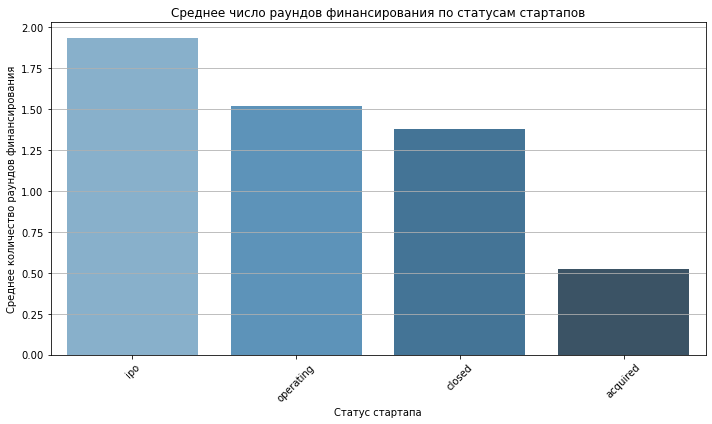

In [105]:
# Визуализируем рассчет

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rounds_by_status.index, y=avg_rounds_by_status.values, palette="Blues_d")
plt.ylabel("Среднее количество раундов финансирования")
plt.xlabel("Статус стартапа")
plt.title("Среднее число раундов финансирования по статусам стартапов")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

- Показатели категории `acquired` сильно меньше остальных категорий. Скорее всего это связано с пропусками и отсутсвием данных о сделке. Это искажает анализ.

- Остальные категории имеют логичные для своего статуса показатели.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

------

`Проделаная работа`:

Предобработка и предварительно ислледование:

- Выгружены все датасеты, познакомились с даннми.
- Проанализированы пропуски и оптимизированы типы данных.
- Проведена предобработка данных.
- Исследовали раунды финансирования по годам.
- Оценили полноту данных об образовании сотрудников.
- Проанализированы столбцы по которым можно объединить таблицы.
- Проделана работа с проблемным датасетом.

`Иследовательский анализ`:

- Объединили данные в необходимый для задач датафрейм.
- Провели анализ выбросов определенных столбцов.
- Исследовали "бесплатно" проданные компании.
- Исследовали цены стартапов в разрезе категории.
- Исследовалии данные о раундах финансирования.

`Итоги и выводы`:

- В работе имели достаточно нерпостые разноразмерные датасеты с большим количеством пропусков. Даже после предобработки данных некоторые пропуски могли немного точечно исказить аналитическую картину.
- К анализу выбросов и типичных значений показателей общего финансирования не применимы стандартные методы исследования. 
- Налюдаем 1618 компаний, которые были приобретены за 0 или 1 доллар. Самое большое количество подобных сделок было в 2011 и в 2012 годах.
- Самой привлекательной категорий в плане величины типичной стоимости и размаха показетелей - является категория `real_estate`. Она входит в топ-2 по обоим исследуемым показателям.
- В среднем перед покупкой стартам имеет 1 раунд финансирования. Однако мы наблюдаем не мало выбросов в данных о раундах. 

Полезность полученных данных зависит от конкретной задачи. Часть данных соотвестует здравому смыслу, однако добиться четкости во всех направлениях исследования - вряд ли получится.